# Implementation of ANN using Keras

In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.4/390.3 MB 16.8 MB/s eta 0:00:24
    --------------------------------------- 7.1/390.3 MB 19.8 MB/s eta 0:00:20
   - -------------------------------------- 10.7/390.3 MB 18.7 MB/s eta 0:00:21
   - -------------------------------------- 16.3/390.3 MB 20.5 MB/s eta 0:00:19
   - -------------------------------------- 17.8/390.3 MB 17.8 MB/s eta 0:00:21
   -- ------------------------------------- 20.4/390.3 MB 17.2 MB/s eta 0:00:22
   -- ------------------------------------- 23.9/390.3 MB 16.8 MB/s eta 0:00:22
   --- ------------------------------------ 29.4/390.3 MB 17.7 MB/s eta 0:00:21
   --- ------------------------------------ 33.3/390.3 MB 17.8 MB/s eta 0:00:21
   --- ------------------------------------ 35.4/390.3 MB 17.0 MB/s eta 0:00:21
   --- ------------------------------------ 38.5/390.3 MB 16.7 MB/s eta 0:00:22
   ---- ----------------------------------- 41.9/39

In [4]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [5]:
# Checking version of Tensorflow and Keras
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.18.0
Keras version: 3.7.0


In [6]:
os.getcwd()

'd:\\Data Science Master\\Course\\76. Neural Networks (17th - 22th May)'

# GPU / CPU Check

In [7]:
tf.config.list_physical_devices("GPU")

[]

In [8]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
check_list = ['GPU', 'CPU']

for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"{device} is available")
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available")

GPU isn't available
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data

In [10]:
mnist = tf.keras.datasets.mnist

In [12]:
mnist

<module 'keras.api.datasets.mnist' from 'c:\\Users\\arshn\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
X_train_full.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train_full[0].shape

(28, 28)

In [19]:
print(f"data type of X_train_full: {X_train_full.dtype}, \n Shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8, 
 Shape of X_train_full: (60000, 28, 28)


In [20]:
X_test.shape

(10000, 28, 28)

In [21]:
len(X_test[1][0])

28

In [22]:
# crete a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [23]:
# TRAIN - 55000
# Test - 10000
# Validation - 5000

In [24]:
len(X_train_full[5000:])

55000

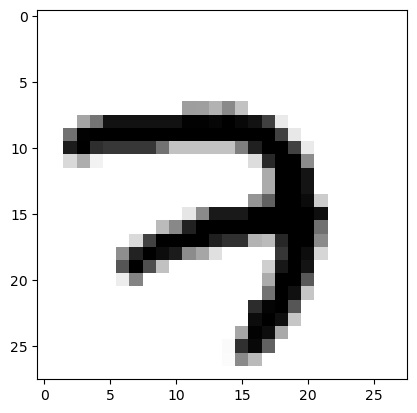

In [25]:
# Lets view some data

plt.imshow(X_train[0], cmap='binary')
plt.show()

<Axes: >

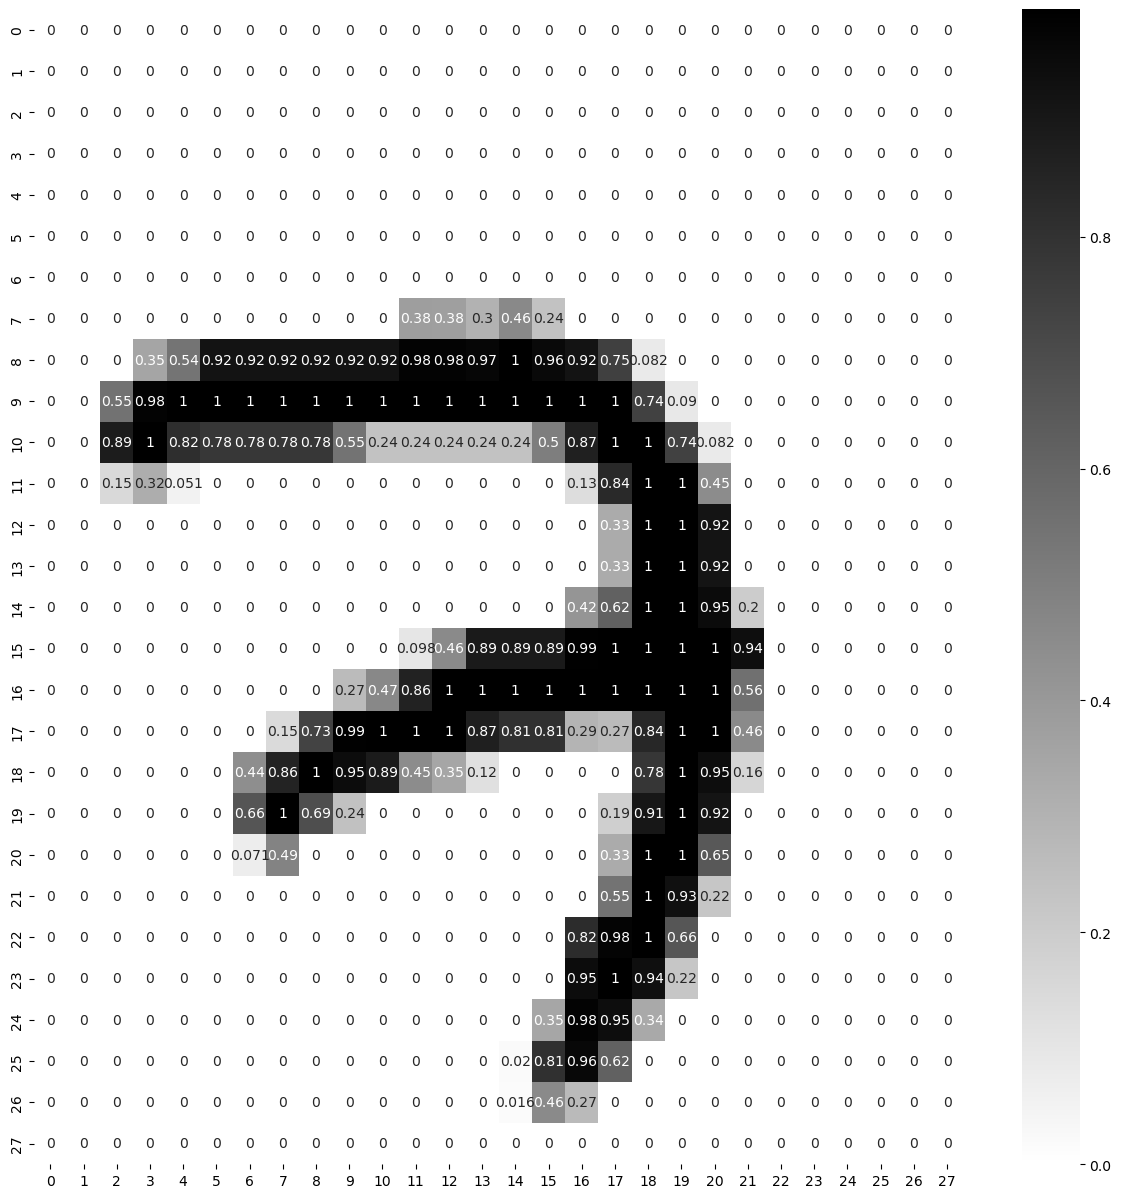

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True,cmap='binary')

In [27]:
28*28

784

In [28]:
# Read from notes for proper visualization

In [34]:
# Creating layers of ANN
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")  # softmax for probability distribution
]

model_clf = tf.keras.models.Sequential(LAYERS)

c:\Users\arshn\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Methpod 2 in notes

In [36]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [ ]:
print("Hidden Layer 1",784*300+300)
print("Hidden Layer 2",300*100+100)

Hidden Layer 1 235500
Hidden Layer 1 30100


In [39]:
model_clf.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# firstLayer * secondlayer + bias
784*300 + 300, 300*100 + 100, 100*10 + 10

(235500, 30100, 1010)

In [44]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [45]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [51]:
hidden1.get_weights()[0].shape #  weights and  bias


(784, 300)

In [52]:
hidden1.get_weights()[1].shape 

(300,)

In [53]:
len(hidden1.get_weights())

2

In [54]:
weights, biases = hidden1.get_weights()

In [55]:
weights.shape

(784, 300)

In [56]:
biases.shape

(300,)

In [57]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.categorical_crossentropy
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

# Tensorboard callback Functions

In [77]:
# Logging

import time

def get_log_path(log_dir="logs/fit"):
    filename = time.strftime("log_%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, filename)
    print(f"Saving logs to {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs to logs/fit\log_2024_12_26_17_06_46


# Early Stoppping Callback

In [78]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Model Checkpointing Callback

In [80]:
CKPT_path = "Model_ckpt.keras"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)


In [82]:
# Training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32
                        , callbacks=[tb_cb, early_stopping_cb, checkpointing_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9959 - loss: 0.0226 - val_accuracy: 0.9786 - val_loss: 0.0671
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9960 - loss: 0.0222 - val_accuracy: 0.9796 - val_loss: 0.0684
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9962 - loss: 0.0216 - val_accuracy: 0.9794 - val_loss: 0.0659
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9963 - loss: 0.0208 - val_accuracy: 0.9790 - val_loss: 0.0654
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9964 - loss: 0.0203 - val_accuracy: 0.9794 - val_loss: 0.0665
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9972 - loss: 0.0179 - val_accuracy: 0.9800 - val_loss: 0.0664
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9977 - loss: 0.0169 - val_accuracy: 0.9808 - val_loss: 0.0655
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9976 - loss: 0

In [83]:
# Checkpoint training

#loading checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=10, validation_data=VALIDATION_SET, batch_size=32
                        , callbacks=[tb_cb, early_stopping_cb, checkpointing_cb])

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9984 - loss: 0.0126 - val_accuracy: 0.9800 - val_loss: 0.0681
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9987 - loss: 0.0125 - val_accuracy: 0.9800 - val_loss: 0.0652
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9986 - loss: 0.0117 - val_accuracy: 0.9798 - val_loss: 0.0672
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9986 - loss: 0.0115 - val_accuracy: 0.9806 - val_loss: 0.0668
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9989 - loss: 0.0107 - val_accuracy: 0.9816 - val_loss: 0.0653
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9989 - loss: 0.0104 - val_accuracy: 0.9816 - val_loss: 0.0664
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9989 - loss: 0.0096 - val_accuracy: 0.9814 - val_loss: 0.0662


# Saving the model

In [86]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
    os.makedirs(MODEL_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S.h5")
    model_path = os.path.join(MODEL_dir, fileName)
    print(f"Model {fileName} will be saved at {model_path}")
    return model_path

In [87]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2024_12_26_17_26_22.h5 will be saved at TRAINED_MODEL\Model_2024_12_26_17_26_22.h5


'TRAINED_MODEL\\Model_2024_12_26_17_26_22.h5'

In [88]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [89]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [90]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.998236,0.013186,0.9800,0.068140
1,0.998345,0.012763,0.9800,0.065226
2,0.998491,0.012205,0.9798,0.067249
3,0.998564,0.011535,0.9806,0.066791
4,0.998727,0.011073,0.9816,0.065312
5,0.998818,0.010602,0.9816,0.066368
6,0.998909,0.010092,0.9814,0.066173


<Axes: >

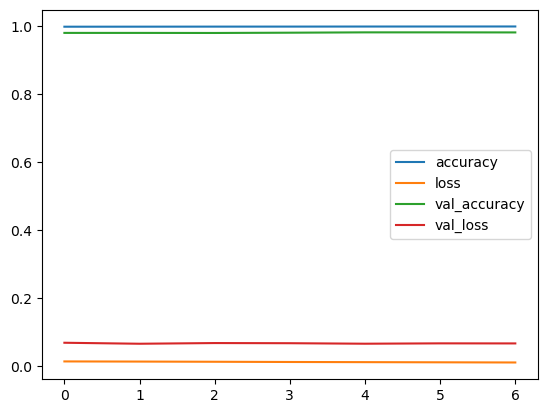

In [91]:
pd.DataFrame(history.history).plot()

In [92]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9768 - loss: 0.0774


[0.06580384820699692, 0.9803000092506409]

SAMPLE CHECK - TEST DATA

In [93]:
x_new = X_test[:3]
# x_new

In [94]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

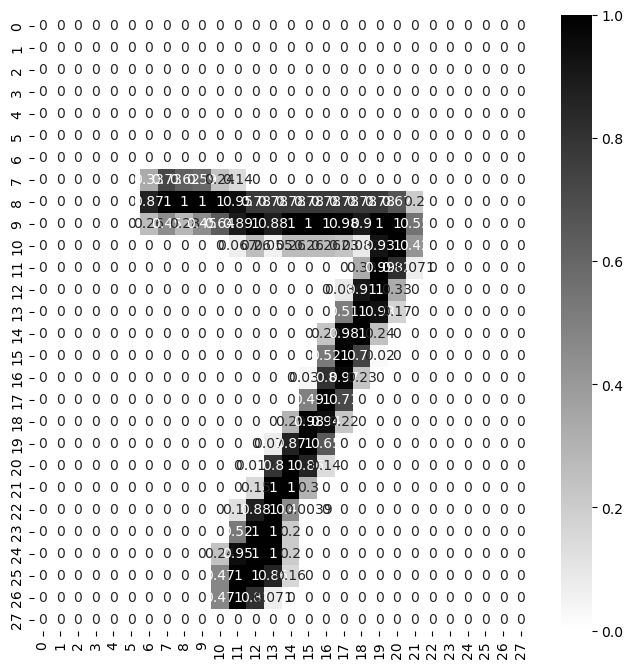

In [95]:
plt.figure(figsize=(8,8))
sns.heatmap(x_new[0], annot=True, cmap="binary")

<Axes: >

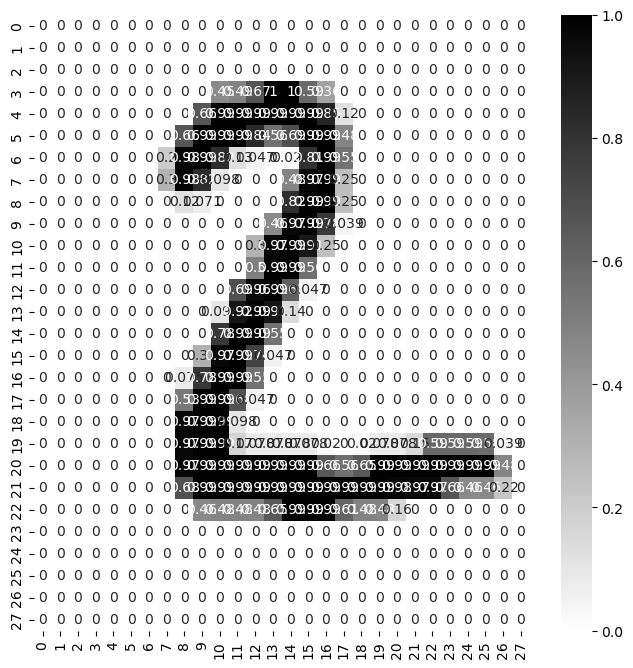

In [96]:
plt.figure(figsize=(8,8))
sns.heatmap(x_new[1], annot=True, cmap="binary")

<Axes: >

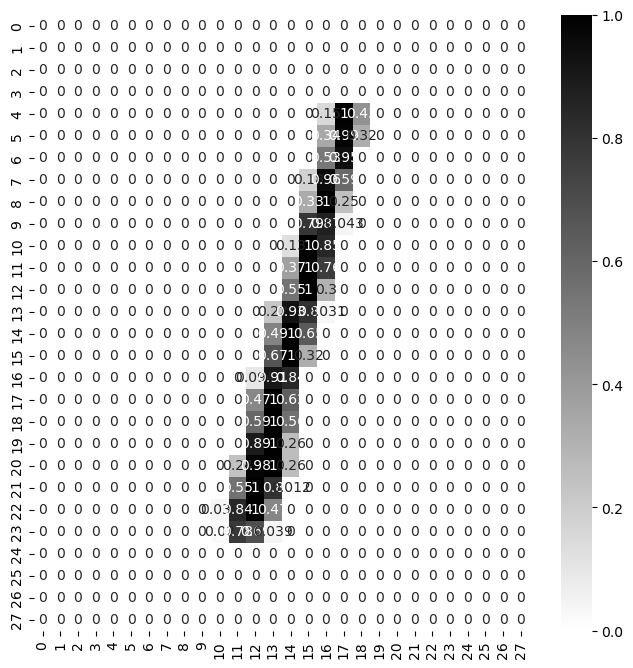

In [97]:
plt.figure(figsize=(8,8))
sns.heatmap(x_new[2], annot=True, cmap="binary")

In [71]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [72]:
y_prob

array([[3.9384508e-06, 2.9366402e-07, 1.3078516e-04, 2.2436553e-04,
        1.7866258e-08, 2.3168154e-06, 2.4098154e-11, 9.9960440e-01,
        9.0259146e-06, 2.4858613e-05],
       [2.5893374e-07, 6.3289326e-06, 9.9987793e-01, 9.6957512e-05,
        1.9633529e-12, 2.6473424e-08, 4.5894674e-07, 1.7901850e-12,
        1.7982624e-05, 7.4878603e-11],
       [3.0320120e-06, 9.9789220e-01, 4.6320559e-04, 3.0589898e-05,
        2.2385929e-04, 2.3157067e-05, 1.0520639e-04, 6.7154819e-04,
        5.8175117e-04, 5.5021060e-06]], dtype=float32)

In [73]:
y_pred = np.argmax(y_prob, axis=-1)

In [74]:
y_pred

array([7, 2, 1], dtype=int64)

In [75]:
actual

array([7, 2, 1], dtype=uint8)

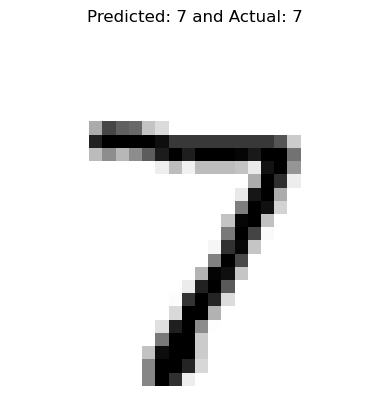

################################################################


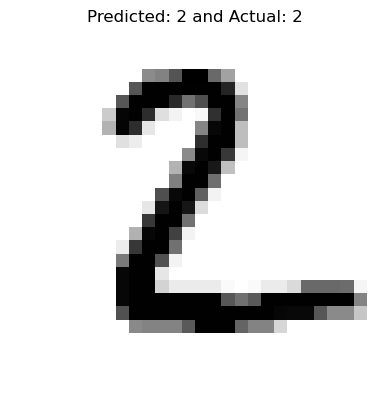

################################################################


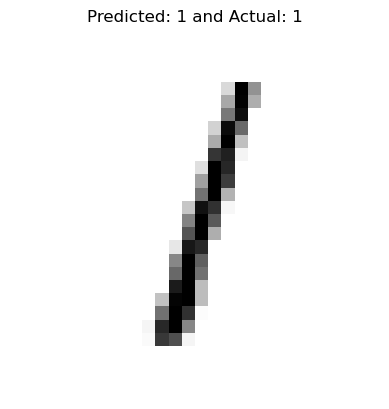

################################################################


In [76]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data, cmap="binary")
    plt.title("Predicted: {} and Actual: {}".format(pred, actual_data))
    plt.axis("off")
    plt.show()
    print("################################################################")

# Loading the Model

In [101]:
path_name_model = "D:\\Data Science Master\\Course\\76. Neural Networks (17th - 22th May)\\TRAINED_MODEL\Model_2024_12_26_17_26_22.h5"
loaded_model = tf.keras.models.load_model(path_name_model)
loaded_model.evaluate(X_test, y_test)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\arshn\AppData\Local\Temp\ipykernel_23212\2683465892.py:1: SyntaxWarning: invalid escape sequence '\M'
  path_name_model = "D:\\Data Science Master\\Course\\76. Neural Networks (17th - 22th May)\\TRAINED_MODEL\Model_2024_12_26_17_26_22.h5"


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9768 - loss: 0.0774


[0.06580384820699692, 0.9803000092506409]

In [102]:
result = loaded_model.predict(x_new)
y_pred = np.argmax(result, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


In [103]:
y_pred

array([7, 2, 1], dtype=int64)

In [104]:
%load_ext tensorboard

In [105]:
%tensorboard --logdir logs/fit